In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

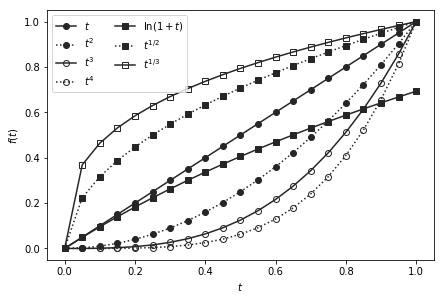

In [2]:
import mpltex3

# @mpltex3.aps_decorator
def my_plot(t):
    fig, ax = plt.subplots(1)
    # linestyles = mpltex3.linestyle_generator()
    linestyles = mpltex3.linestyle_generator(colors=[],
                                        lines=['-',':'],
                                        markers=['o','s'],
                                        hollow_styles=[False, False, True, True])
    
    ax.plot(t, t, label='$t$', **next(linestyles))
    ax.plot(t, t**2, label='$t^2$', **next(linestyles))
    ax.plot(t, t**3, label='$t^3$', **next(linestyles))
    ax.plot(t, t**4, label='$t^4$', **next(linestyles))
    ax.plot(t, np.log(1+t), label='$\ln(1+t)$', **next(linestyles))
    ax.plot(t, t**(1./2), label='$t^{1/2}$', **next(linestyles))
    ax.plot(t, t**(1./3), label='$t^{1/3}$', **next(linestyles))

    ax.set_xlabel('$t$')
    ax.set_ylabel('$f(t)$')
    ax.legend(loc='best', ncol=2)
    fig.tight_layout(pad=0.1)
    fig.savefig('./plots/mpltex-acs-line-markers')

t = np.arange(0, 1.0+0.05, 0.05)
my_plot(t)

In [3]:
from cycler import cycler

# Create cycler object. Use any styling from above you please
monochrome = (cycler('color', ['k']) *
              cycler('linestyle', ['-', '--', ':', '=.']) *
              cycler('marker', ['^',',', '.']))

# Print examples of output from cycler object. 
# A cycler object, when called, returns a `iter.cycle` object that iterates over items indefinitely
print("number of items in monochrome:", len(monochrome))
for i, item in zip(range(15), monochrome()):
    print(i, item)

number of items in monochrome: 12
0 {'color': 'k', 'linestyle': '-', 'marker': '^'}
1 {'color': 'k', 'linestyle': '-', 'marker': ','}
2 {'color': 'k', 'linestyle': '-', 'marker': '.'}
3 {'color': 'k', 'linestyle': '--', 'marker': '^'}
4 {'color': 'k', 'linestyle': '--', 'marker': ','}
5 {'color': 'k', 'linestyle': '--', 'marker': '.'}
6 {'color': 'k', 'linestyle': ':', 'marker': '^'}
7 {'color': 'k', 'linestyle': ':', 'marker': ','}
8 {'color': 'k', 'linestyle': ':', 'marker': '.'}
9 {'color': 'k', 'linestyle': '=.', 'marker': '^'}
10 {'color': 'k', 'linestyle': '=.', 'marker': ','}
11 {'color': 'k', 'linestyle': '=.', 'marker': '.'}
12 {'color': 'k', 'linestyle': '-', 'marker': '^'}
13 {'color': 'k', 'linestyle': '-', 'marker': ','}
14 {'color': 'k', 'linestyle': '-', 'marker': '.'}


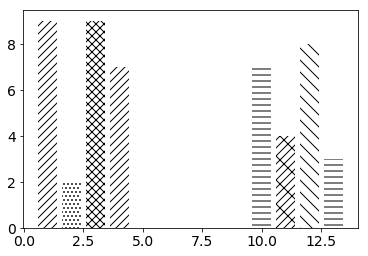

In [120]:
fig, ax = plt.subplots(1,1)

bar_cycle = (cycler('hatch', ['///', '--', '...','\///', 'xxx', '\\\\']) * cycler('color', 'w')*cycler('zorder', [10]))
styles = bar_cycle()

for x in range(1,5):
    ax.bar(x, np.random.randint(2,10), **next(styles))
    ax.bar(x+9, np.random.randint(2,10), **next(styles))

In [5]:
data_folder = './output_tsne'

datasets={
    "MNIST mini": "MNIST-SMALL",
    "COIL-20": "COIL20",
    "MNIST 2000 samples": "MNIST-2000",
    "Country Indicators 1999": "COUNTRY1999",
    "Country Indicators 2013": "COUNTRY2013",
    "Country Indicators 2014": "COUNTRY2014",
    "Country Indicators 2015": "COUNTRY2015",
    "Cars and Trucks 2004": "CARS04",
    "Breast Cancer Wisconsin (Diagnostic)": "BREAST-CANCER95",
    "Pima Indians Diabetes": "DIABETES",
    "Multidimensional Poverty Measures": "MPI"
}

In [6]:
line_names = [
    ('NLL(all)', 'q_link', 1),
    ('NLL(ml)', 'q_ml', 1),
    ('NLL(cl)', 'q_cl', 1),
    ('AUC R_NX', 'auc_rnx', -1),
    ('CorrCoef', 'pearsonr', -1),
    ('MDS Stress', 'mds_isotonic', 1),
    ('CCA Stress', 'cca_stress', 1),
    ('Sammon NLM', 'sammon_nlm', 1),
]
needed_columns = list(map(lambda x: x[1], line_names))

In [7]:
def _normalize_0_1(arr):
    return (arr - arr.max()) / -np.ptp(arr)

def _standardize(arr):
    return (arr - arr.mean()) / arr.std()

In [8]:
def load_df(dataset_name, filter_perp = True, lr=100.0, standardize=True, log_scale=False):
    """Load data from pickle file
        The result is a list of object (dict), which then be converted into pandas dataframe
    """
    if dataset_name == "": return None
    
    in_name = '{}/tsne_{}.pkl'.format(data_folder, dataset_name)
    pkl_data = pickle.load(open(in_name, 'rb'))
    embeddeds = pkl_data['results']
    df = pd.DataFrame.from_records(embeddeds, exclude=["embedding"])
    
    if lr is not None:
        df = df[df['learning_rate']==lr]
    if filter_perp:
        df = df[(df['perplexity']<1000) & (df['perplexity']>=1.0)]
    
    for _, col_name, correct_factor in line_names:
        df[col_name] = df[col_name] * correct_factor
    
    if standardize:
        cs = needed_columns
        df[cs] = (df[cs] - df[cs].mean()) / df[cs].std()
    if log_scale:
        df['perplexity'] = np.log(df['perplexity'])

    return df

In [23]:
dataset_name = 'MNIST-SMALL'
df = load_df(dataset_name)
latex = df.to_latex()
print(latex)

\begin{tabular}{lrrrrrrrrrrrrrrlr}
\toprule
{} &   auc\_rnx &  cca\_stress &  learning\_rate &      loss &  mds\_isotonic &  n\_iter &       p\_cl &     p\_link &       p\_ml &  pearsonr &  perplexity &      q\_cl &    q\_link &      q\_ml & running\_time &  sammon\_nlm \\
\midrule
20  &  2.714566 &    2.675056 &          100.0 &  0.736849 &      2.223576 &    2000 & -37.043653 &  -1.000000 &  36.043653 &  2.693243 &         1.0 &  0.046464 &  2.758610 &  2.978947 &        92.33 &   -0.050211 \\
28  &  0.197145 &    1.243627 &          100.0 &  0.769899 &      1.246891 &    2000 & -37.043653 &  -3.015996 &  34.027658 &  1.167424 &         2.0 & -0.907073 &  0.302801 &  0.944059 &        92.13 &   -0.733891 \\
36  & -0.609523 &    0.320390 &          100.0 &  0.869852 &      0.421847 &    2000 & -37.043653 &  -3.342256 &  33.701398 &  0.167259 &         5.0 & -1.076499 & -0.364985 &  0.329941 &        92.49 &   -0.590231 \\
44  & -0.890760 &    0.070561 &          100.0 &  0.850324 &   

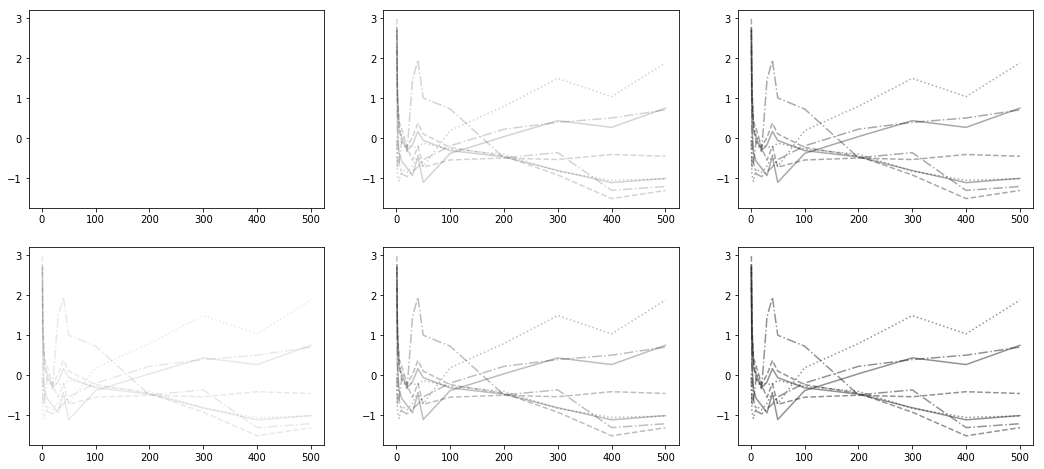

In [10]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

from cycler import cycler
color_c = cycler('color', ['k'])
style_c = cycler('linestyle', ['-', '--', ':', '-.'])
markr_c = cycler('marker', ['', '.', 'o'])
c_cms = color_c * markr_c * style_c
c_csm = color_c * style_c * markr_c
    
fig, axes = plt.subplots(2, 3, figsize=(18,8))
plt.rc('axes', prop_cycle=c_cms)
x = df['perplexity']
y = df['auc_rnx']
# axes[0, 0].plot(x, y)
# axes[1, 1].scatter(x, y)

linestyles = mpltex3.linestyle_generator(colors=[], #['g', 'b', 'r'],
    lines=['-','--', ':', '-.'],
    markers=[], #['', '.','*', 'o'],
    hollow_styles=[True, True, True])

t = df['perplexity']

for r in range(2):
    for c in range(3):
        for line in needed_columns:
            axes[r, c].plot(t, df[line], **next(linestyles), alpha=(0.1*r + 0.2*c))
            
plt.savefig('./plots/test_fig.eps')

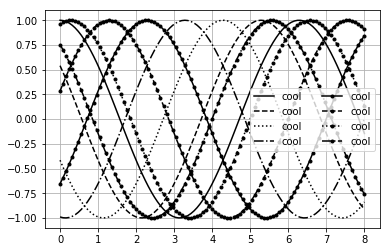

In [11]:
x = np.linspace(0, 8, 101)
y = np.cos(np.arange(8)+x[:,None])
plt.rc('axes', prop_cycle=c_cms)
plt.plot(x, y, label='cool');
plt.grid();
plt.legend(loc='best', ncol=2)

In [12]:
def plot_t():
    fig, ax = plt.subplots(1)
    # linestyles = mpltex3.linestyle_generator()
    linestyles = mpltex3.linestyle_generator(colors=[], #['g', 'b', 'r'],
                                        lines=['-','--', ':', '-.'],
                                        markers=['', '.','*', 'o'],
                                        hollow_styles=[True, True, True])

    t = df['perplexity']
    for line in needed_columns:
        ax.plot(t, df[line], **next(linestyles))
    
#     ax.plot(t, df['q', label='$t$', **next(linestyles))
#     ax.plot(t, t**2, label='$t^2$', **next(linestyles))
#     ax.plot(t, t**3, label='$t^3$', **next(linestyles))
#     ax.plot(t, t**4, label='$t^4$', **next(linestyles))
#     ax.plot(t, np.log(1+t), label='$\ln(1+t)$', **next(linestyles))
#     ax.plot(t, t**(1./2), label='$t^{1/2}$', **next(linestyles))
#     ax.plot(t, t**(1./3), label='$t^{1/3}$', **next(linestyles))

#     ax.set_xlabel('$t$')
#     ax.set_ylabel('$f(t)$')
    ax.legend(loc='best', ncol=2)
    plt.grid()
    fig.tight_layout(pad=0.1)

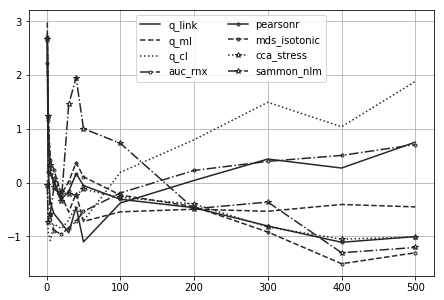

In [13]:
plot_t()

In [108]:
def plot_manual(ax, dataset_name, ax_legend=None):
    df = load_df(dataset_name)
    x = df['perplexity']
    x_labels = list(map(int, x.values))
    
    ax.set_title(dataset_name)
    ax.set_xscale('log')
    ax.set_xticklabels(x_labels)
    
    lines = []
    confs = [
        ('q_link', '-*',    2.0, 0.8),
        ('q_ml', '--',      2.0, 0.8),
        ('q_cl', '-.',      2.0, 0.8),
        ('auc_rnx', '-',    1.5, 1.0),
        ('pearsonr', '-.',  1.0, 1.0),
        ('cca_stress', '--',0.6, 0.8),
        ('mds_isotonic','-',0.6, 0.8),
        ('sammon_nlm', ':', 0.8, 0.6)
    ]
    
    for name, style, width, alpha in confs:
        lines += ax.plot(x, df[name], style,  linewidth=width, alpha=alpha)
    
    if ax_legend is not None:
        from matplotlib.legend import Legend
        labels = list(map(lambda x: x[0], confs))
        leg = Legend(ax_legend, lines, labels, loc='center', frameon=True)
        plt.axis('off')
        ax_legend.add_artist(leg);

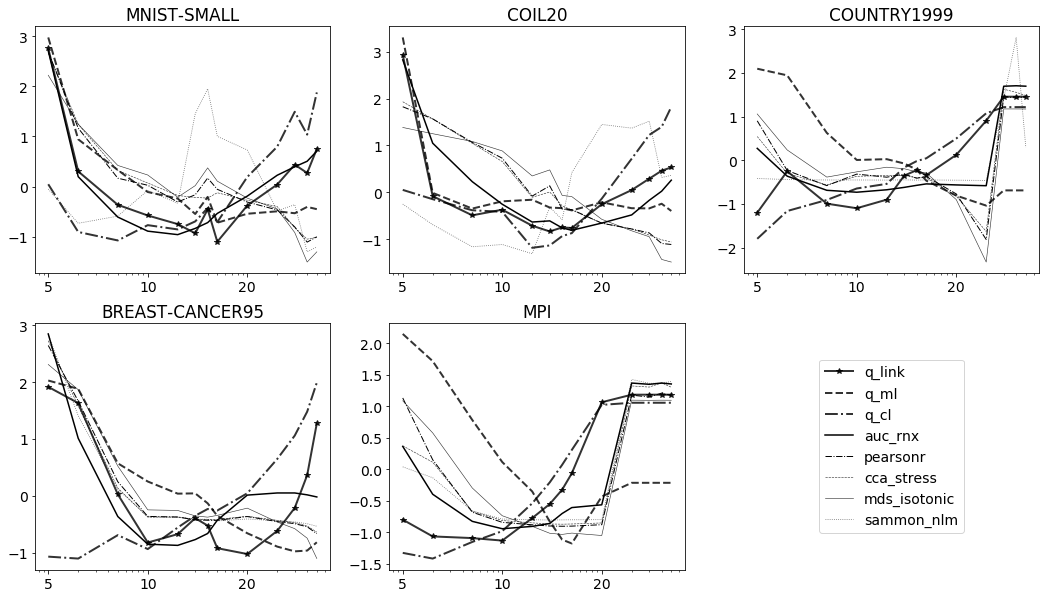

In [109]:
matplotlib.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(2, 3, figsize=(18,10))
plot_manual(axes[0, 0], 'MNIST-SMALL')
plot_manual(axes[0, 1], 'COIL20')
plot_manual(axes[0, 2], 'COUNTRY1999')
plot_manual(axes[1, 0], 'BREAST-CANCER95')
plot_manual(axes[1, 1], 'MPI', axes[1,2])

# fig.tight_layout(pad=0.1)
plt.savefig('./plots/nll_metrics.pdf')

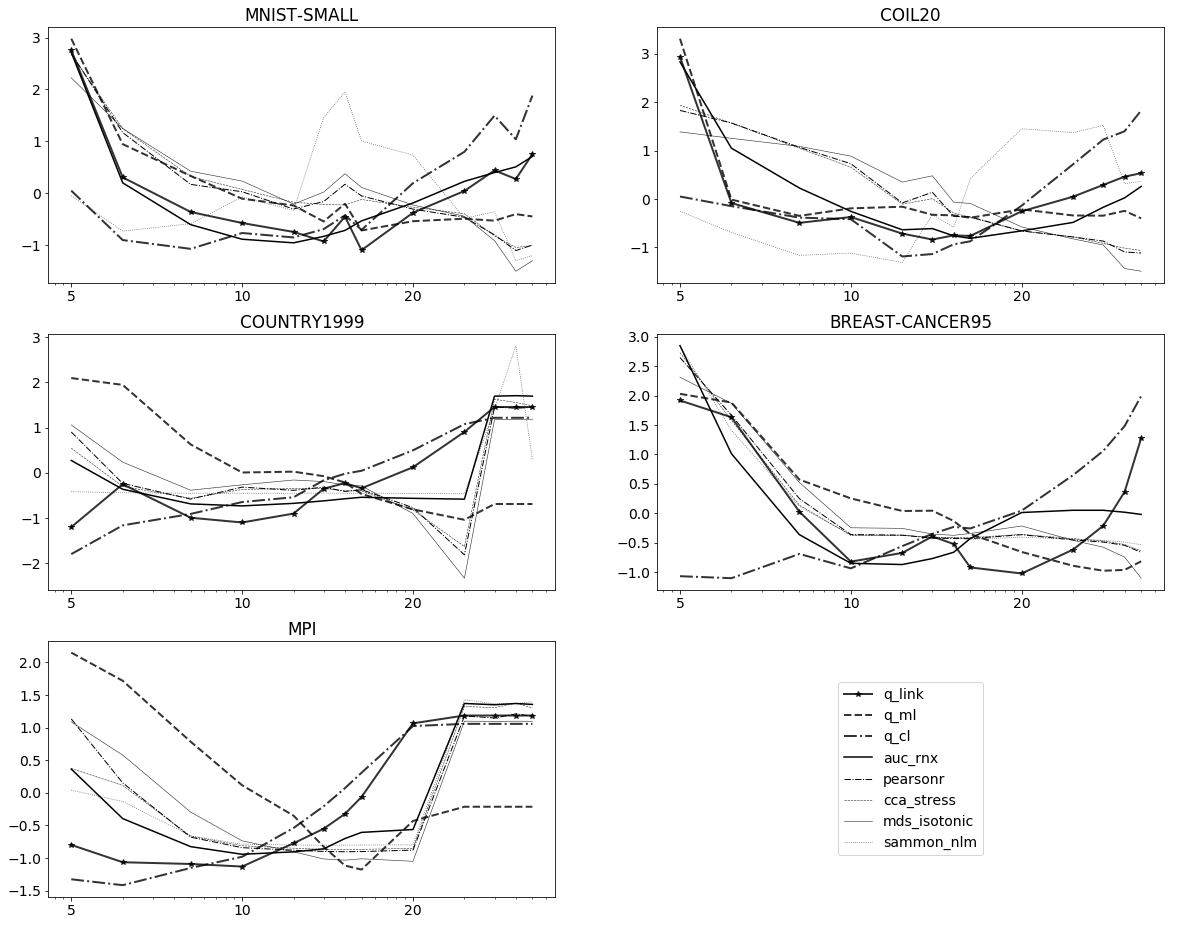

In [110]:
matplotlib.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(3, 2, figsize=(20,16))
plot_manual(axes[0, 0], 'MNIST-SMALL')
plot_manual(axes[0, 1], 'COIL20')
plot_manual(axes[1, 0], 'COUNTRY1999')
plot_manual(axes[1, 1], 'BREAST-CANCER95')
plot_manual(axes[2, 0], 'MPI', axes[2,1])

# fig.tight_layout(pad=0.1)
plt.savefig('./plots/nll_metrics2.pdf')

In [24]:
# calculate cosine distances for 3 type of links vs 5 metric scores

from scipy.spatial.distance import cosine

def calculate_cosine_dist(dataset_name):
    df = load_df(dataset_name)
    target_lines = ['auc_rnx', 'pearsonr', 'cca_stress', 'mds_isotonic', 'sammon_nlm']
    res = {target_line: () for target_line in target_lines}
    for target_line in target_lines:
        cosine_all = cosine(df['q_link'], df[target_line])
        cosine_ml = cosine(df['q_ml'], df[target_line])
        cosine_cl = cosine(df['q_cl'], df[target_line])
        res[target_line] = (cosine_all, cosine_ml, cosine_cl)
        
    return res

In [93]:
selected_datasets = [
    'MNIST-SMALL',
    'COIL20',
    'COUNTRY1999',
    'BREAST-CANCER95',
    'MPI'
]

name0 = """{name} & \\vtop[ \\hbox[ \\strut \\verb|q_all| ] \\hbox[ \\strut \\verb|q_ml| ] \\hbox[ \\strut \\verb|q_cl| ] ] &"""

cell0 = " ({:.3f}, {:.3f}, {:.3f}) &"
cell = "\\vtop[ \\hbox[ \\strut {qall}]  \\hbox[ \\strut {qml}]  \\hbox[ \\strut {qcl}] ] &"

wrap0 = "{value:.3f}"
wrap1 = "\\textbf[{value:.3f}]"

for dataset_name in selected_datasets:
    res = calculate_cosine_dist(dataset_name)
    row = name0 .format(name=dataset_name)
    
    for k, v in res.items():
        v_all, v_ml, v_cl = v
        v_min = min(min(v_all, v_ml), v_cl)
        qall = (wrap1 if v_all == v_min else wrap0).format(value=v_all)
        qml = (wrap1 if v_ml == v_min else wrap0).format(value=v_ml)
        qcl = (wrap1 if v_cl == v_min else wrap0).format(value=v_cl)
        # print(qall, qml, qcl)
        row += cell.format(qall=qall, qml=qml, qcl=qcl)
    row = "{}\\\\".format(row[:-1])
    row = row.replace("[", "{")
    row = row.replace("]", "}")
    
    print(row)
    print("\hline")
    print()

MNIST-SMALL & \vtop{ \hbox{ \strut \verb|q_all| } \hbox{ \strut \verb|q_ml| } \hbox{ \strut \verb|q_cl| } } &\vtop{ \hbox{ \strut \textbf{0.031}}  \hbox{ \strut 0.279}  \hbox{ \strut 0.502} } &\vtop{ \hbox{ \strut 0.436}  \hbox{ \strut \textbf{0.077}}  \hbox{ \strut 1.455} } &\vtop{ \hbox{ \strut 0.429}  \hbox{ \strut \textbf{0.066}}  \hbox{ \strut 1.459} } &\vtop{ \hbox{ \strut 0.637}  \hbox{ \strut \textbf{0.180}}  \hbox{ \strut 1.626} } &\vtop{ \hbox{ \strut 1.410}  \hbox{ \strut \textbf{1.147}}  \hbox{ \strut 1.444} } \\
\hline

COIL20 & \vtop{ \hbox{ \strut \verb|q_all| } \hbox{ \strut \verb|q_ml| } \hbox{ \strut \verb|q_cl| } } &\vtop{ \hbox{ \strut \textbf{0.117}}  \hbox{ \strut 0.130}  \hbox{ \strut 0.757} } &\vtop{ \hbox{ \strut 0.691}  \hbox{ \strut \textbf{0.403}}  \hbox{ \strut 1.446} } &\vtop{ \hbox{ \strut 0.650}  \hbox{ \strut \textbf{0.371}}  \hbox{ \strut 1.420} } &\vtop{ \hbox{ \strut 0.921}  \hbox{ \strut \textbf{0.538}}  \hbox{ \strut 1.676} } &\vtop{ \hbox{ \strut 

In [180]:
import collections
from pprint import pprint

target_lines = ['auc_rnx', 'pearsonr', 'cca_stress', 'mds_isotonic', 'sammon_nlm']
base_lines = ['q_link', 'q_ml', 'q_cl']

def cal_sum_diff():
    traces = collections.defaultdict(dict)
    for base_line in base_lines:
        for target_line in target_lines:
            traces[base_line][target_line] = []

    for dataset_name in selected_datasets:
        df = load_df(dataset_name)

        for base_line in base_lines:
            for target_line in target_lines:
                diff = df[base_line] - df[target_line]
                value = np.sum(np.abs(diff))
                traces[base_line][target_line].append(value)
    return dict(traces)

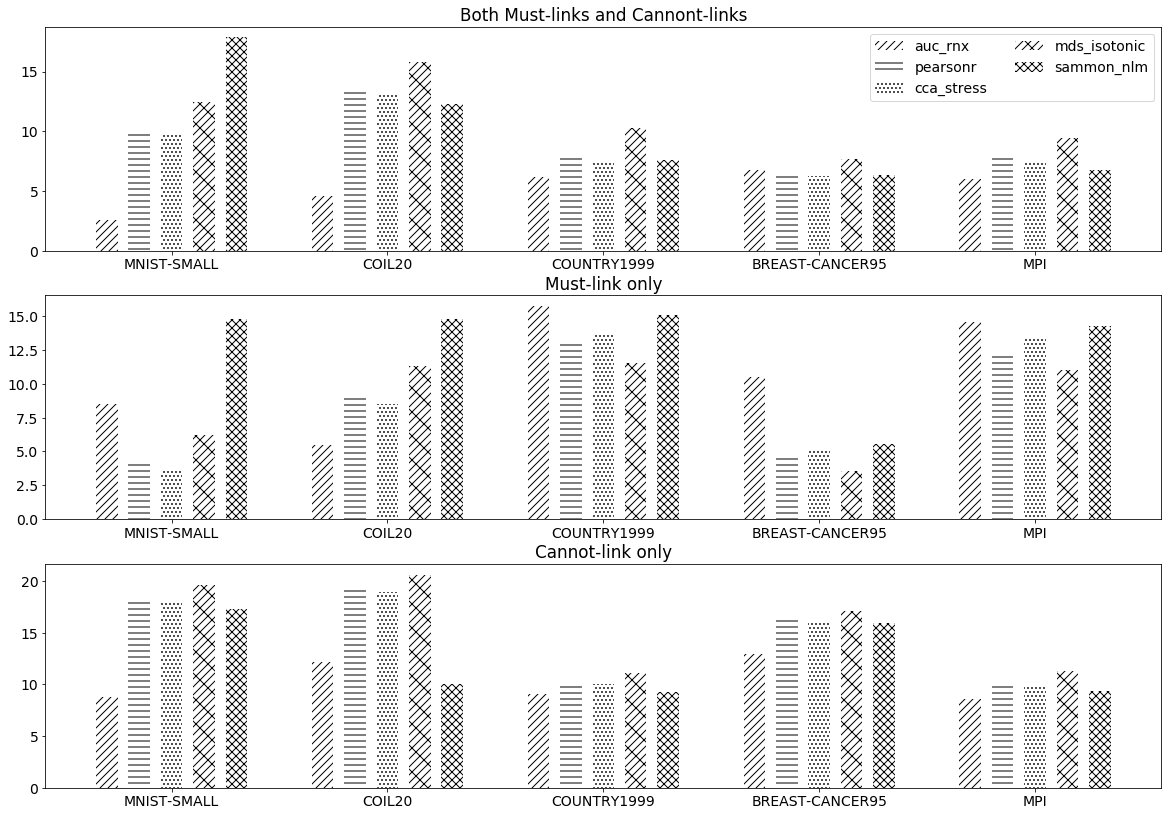

In [224]:
bar_cycle = (cycler('hatch', ['///', '--', '...','\///', 'xxx']) * cycler('color', 'w') * cycler('zorder', [5]))
bar_styles = bar_cycle()

width = 0.1
x_data = np.arange(len(selected_datasets))
    
def _plot_sum_diff(ax, data, title, legend=False):
    for i, (line_name, values) in enumerate(data.items()):
        ax.bar(x_data + i * 0.15, values, width, **next(bar_styles), label=line_name)

    ax.set_title(title)
    ax.set_xticks(x_data + 0.3)
    ax.set_xticklabels(selected_datasets)
    
    if legend:
        ax.legend(loc='best', ncol=2)
    
    
def plot_sum_diff():
    res = cal_sum_diff()
    fig, axes = plt.subplots(3, 1, figsize=(20,14))
    _plot_sum_diff(axes[0], res['q_link'], 'Both Must-links and Cannont-links', legend=True)
    _plot_sum_diff(axes[1], res['q_ml'], 'Must-link only')
    _plot_sum_diff(axes[2], res['q_cl'], 'Cannot-link only')
    plt.savefig('./plots/sum_diff.pdf')
    plt.show()
    
plot_sum_diff()

In [100]:
# using plotly for notebook in offline mode
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [101]:
def use_plotly(dataset_name):
    df = load_df(dataset_name)
    x_data = np.log(df.perplexity)
    
    confs = [ # http://www.r-graph-gallery.com/125-the-plotlys-symbols/
        ('q_link', dict(shape = 'spline', width = 2.5), dict(symbol=1)),
        ('q_ml', dict(shape = 'spline', width=2.5, dash='solid'), dict(symbol=0)),
        ('q_cl', dict(shape = 'spline', width=2.5, dash='dot'), dict(symbol=4)),
        ('auc_rnx', dict(shape = 'spline', width=1.25, dash='solid'), dict(symbol=25)),
        ('pearsonr', dict(shape = 'spline', width=1.25, dash='dash'), dict(symbol=20)),
        ('cca_stress', dict(shape = 'spline', width=1.25, dash='dot'), dict(symbol=8)),
        ('mds_isotonic', dict(shape = 'spline', width=1.25, dash='dashdot'), dict(symbol=5)),
        ('sammon_nlm', dict(shape = 'spline', width=0.75, dash='dot'), dict(symbol=0)),
    ]
    
    traces = []
    for line_name, line_conf, marker_conf in confs:
        trace = go.Scatter(
            x=x_data,
            y=df[line_name],
            name=line_name,
            line=line_conf,
            marker=marker_conf,
        )
        traces.append(trace)
        # fig.append_trace(trace, 1, 1)
        
    layout = go.Layout(
        title=dataset_name,
        autosize=False,
        showlegend=True,
        xaxis=dict(
            tickvals=x_data,
            ticktext=df.perplexity,
            #title='Perplexity in log-scale'
        ),
        width=800,
#         height=600,
        margin=go.Margin(
            l=30,
            r=0,
            b=30,
            t=30,
            pad=0
        ),
#         yaxis=dict(
#             gridcolor='rgb(255,255,255)',
#             showgrid=True,
#             showline=False,
#             showticklabels=True,
#             tickcolor='rgb(127,127,127)',
#             ticks='outside',
#             zeroline=False
#         ),
    )
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

In [102]:
dataset_name = 'COUNTRY1999'
use_plotly(dataset_name)